Load dataset and combine red wine and white wine.<br>check missing value


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Load the datasets with proper delimiter
df_red = pd.read_csv('/content/winequality-red.csv', delimiter=';')
df_white = pd.read_csv('/content/winequality-white.csv', delimiter=';')

# Add 'color' column: 0 for red, 1 for white
df_red['color'] = 0
df_white['color'] = 1

# Combine both datasets
df_full = pd.concat([df_red, df_white], ignore_index=True)

# Save the combined dataset
# df_full.to_csv('/content/winequality-full.csv', index=False)

print("Dataset Overview")
display(df_full.info())
display(df_full.head())
display(df_full.describe())

print("\nMissing Values Check:")
print(df_full.isnull().sum())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000



Missing Values Check:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


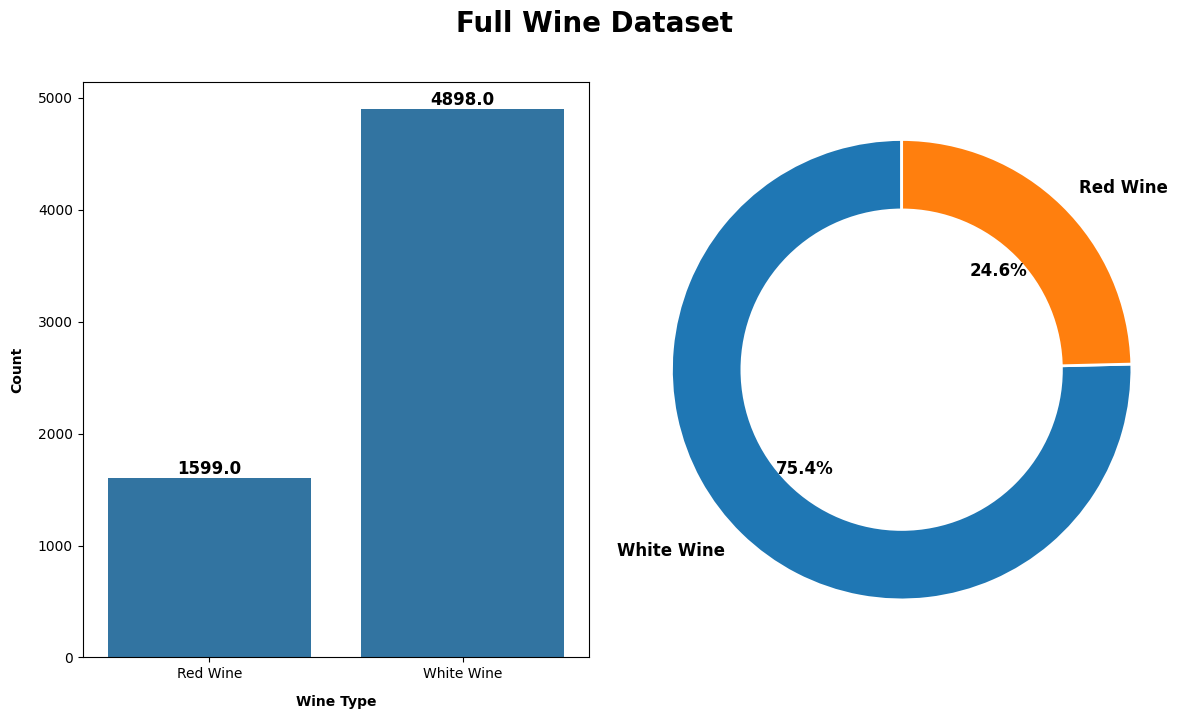

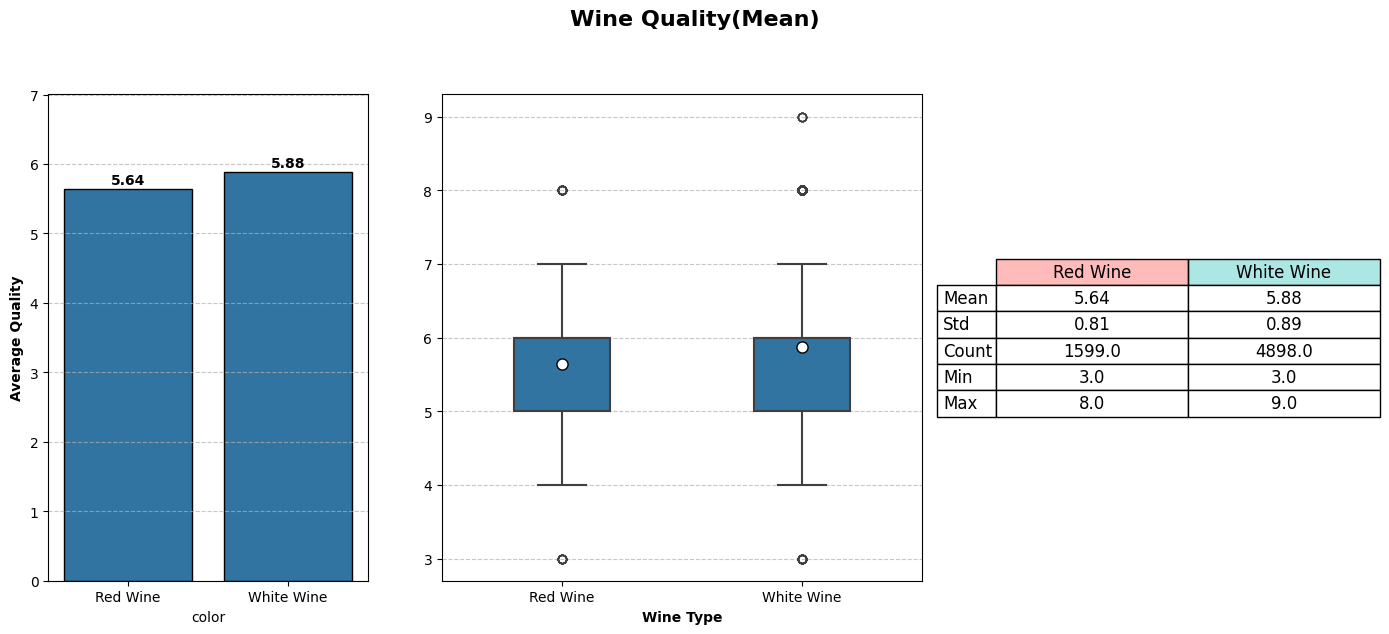

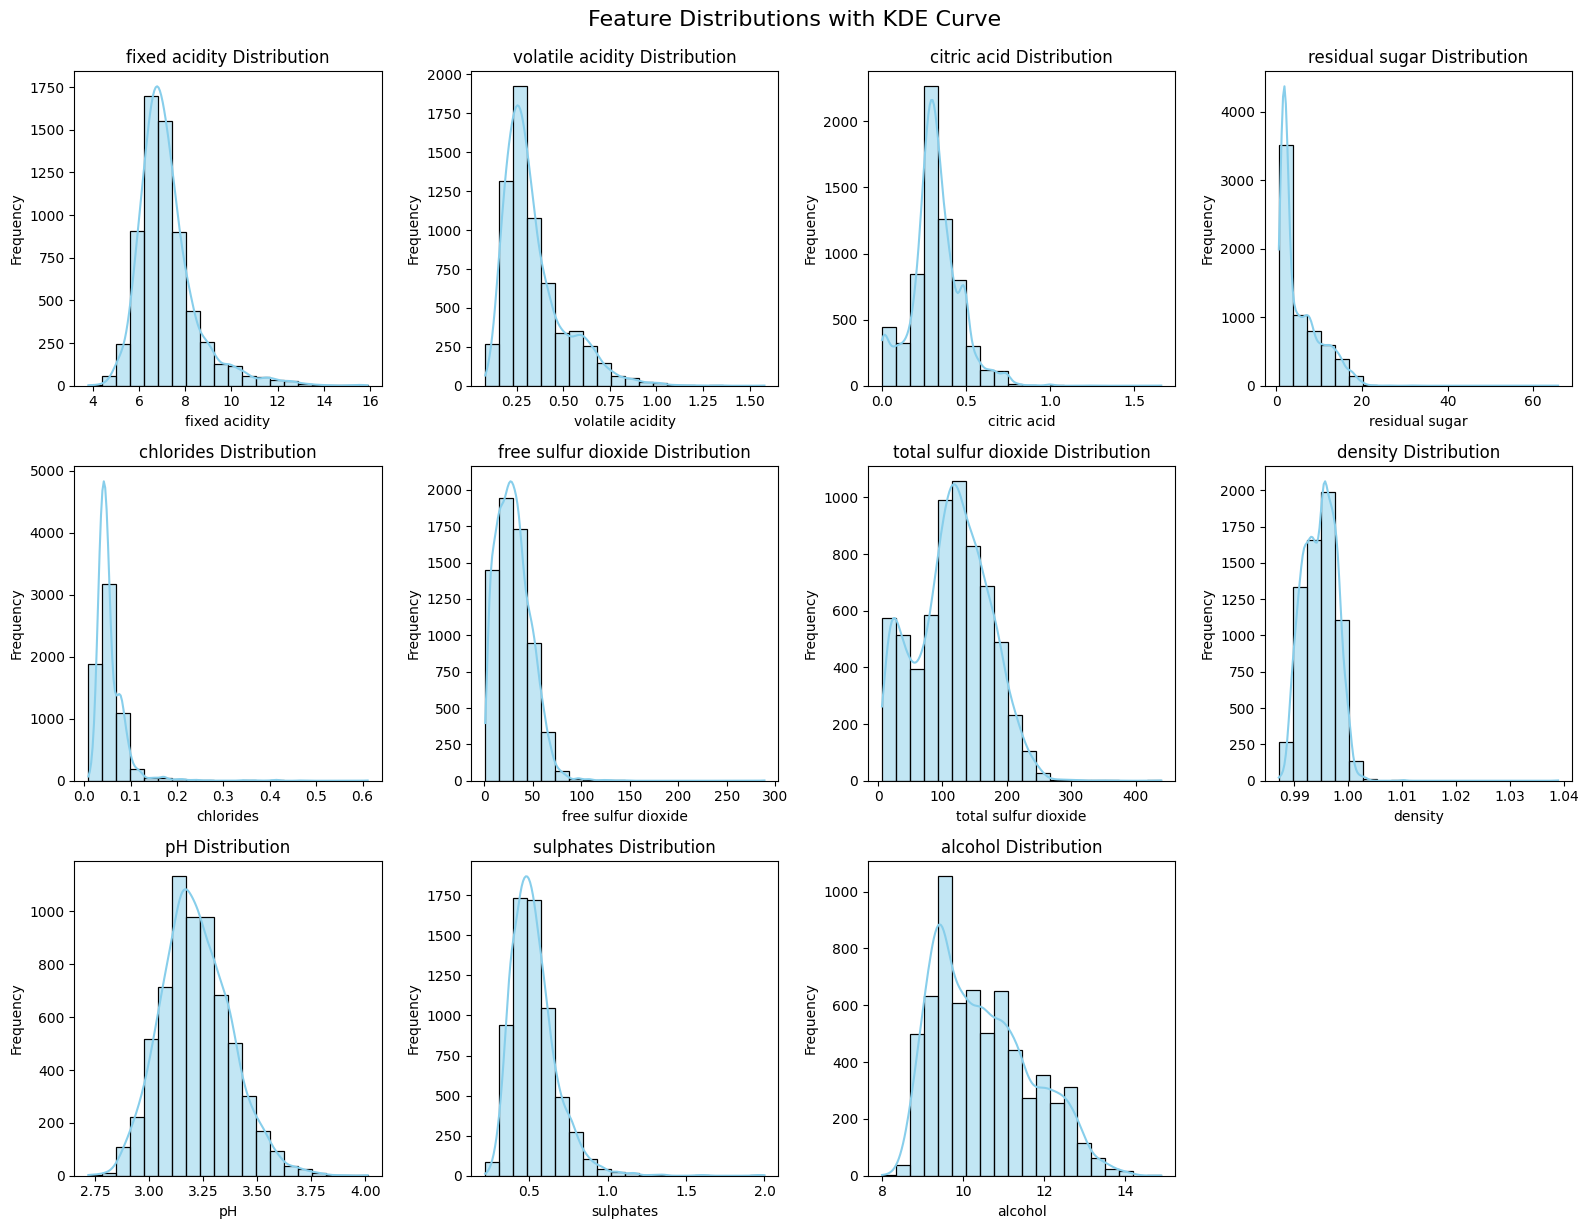

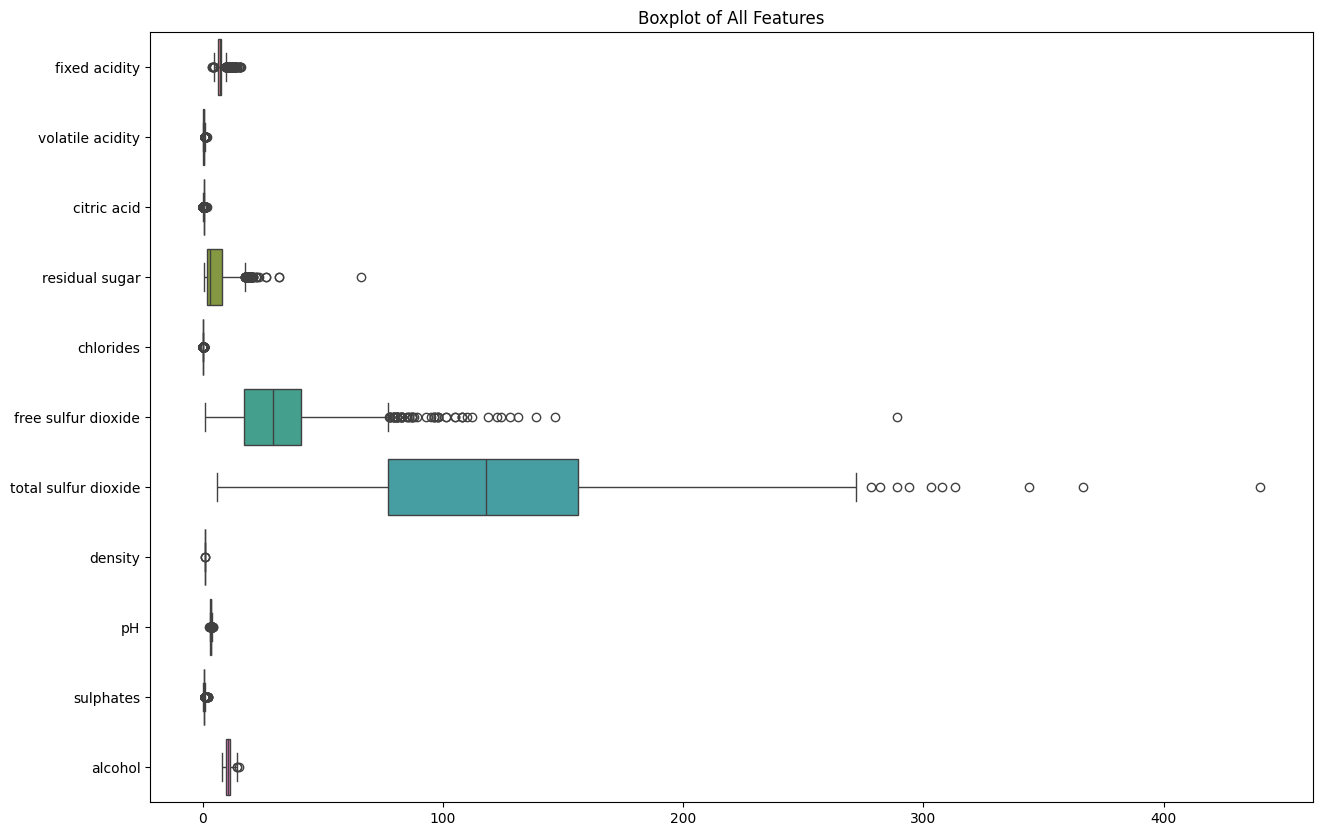

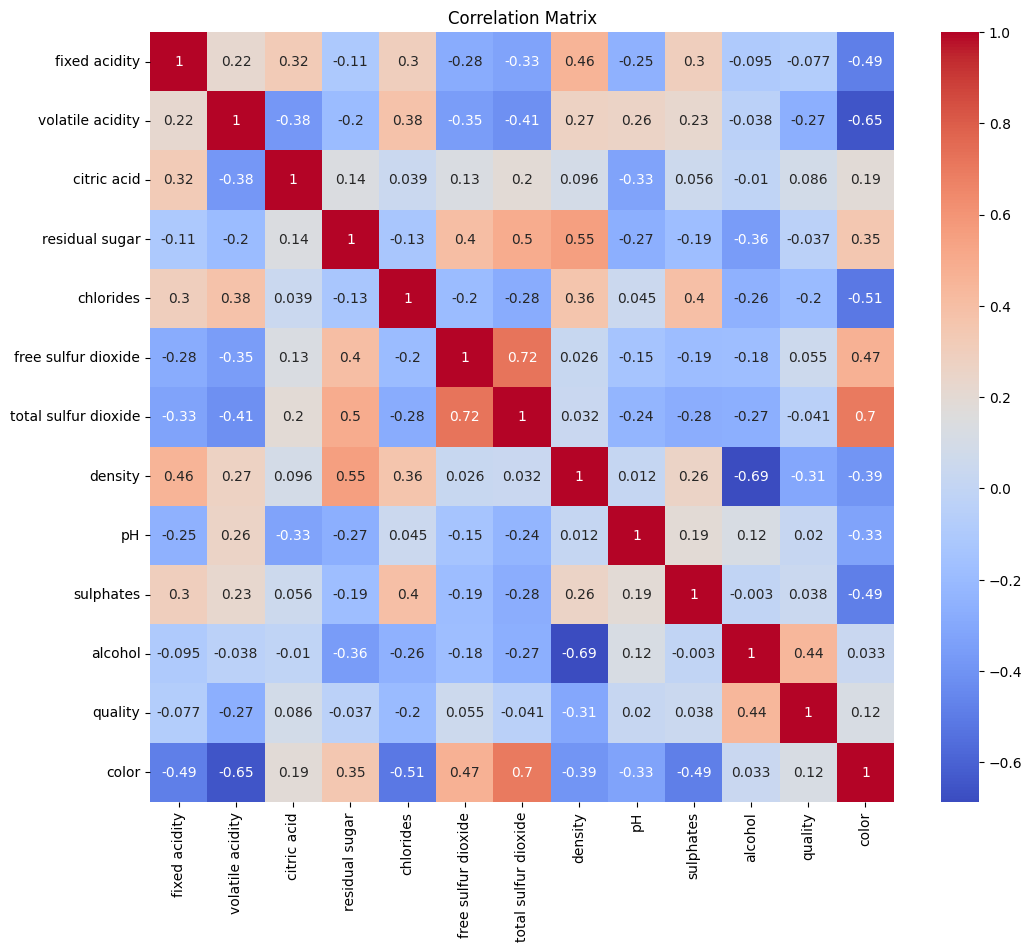

In [ ]:
from matplotlib import cm

# Create figure with subplots
f, ax = plt.subplots(1, 2, figsize=(12, 7))

# Countplot with annotations
count_plot = sns.countplot(data=df_full, x='color', ax=ax[0])
ax[0].set_xlabel('Wine Type', labelpad=10, fontweight='bold')
ax[0].set_ylabel('Count', labelpad=10, fontweight='bold')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Red Wine', 'White Wine'], rotation=0)

# Add exact count labels on bars
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 7),
                       textcoords='offset points',
                       fontsize=12,
                       fontweight='bold')

# Pie/Donut chart with matching colors
labels = ['White Wine', 'Red Wine']
sizes = df_full['color'].value_counts().values

# Draw pie chart
ax[1].pie(sizes, labels=labels,
          autopct='%1.1f%%', startangle=90,
          wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
          textprops={'fontsize': 12, 'fontweight': 'bold'})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax[1].add_artist(centre_circle)
ax[1].axis('equal')
plt.suptitle("Full Wine Dataset", y=1.02, fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()
print("\n")

# Calculate quality statistics
quality_stats = df_full.groupby('color').agg(
    Mean=('quality', 'mean'),
    Std=('quality', 'std'),
    Count=('quality', 'count'),
    Min=('quality', 'min'),
    Max=('quality', 'max')
).reset_index()

# Create visualization
plt.figure(figsize=(14, 6))
grid = plt.GridSpec(1, 3, width_ratios=[1, 1.5, 1.2])

# Bar plot for means
ax1 = plt.subplot(grid[0])
sns.barplot(data=quality_stats, y='Mean', x='color', edgecolor='black',
           errorbar=None, ax=ax1)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Red Wine', 'White Wine'], rotation=0)
ax1.set_ylim(0, 7)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylabel('Average Quality', fontweight='bold')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points',
                fontweight='bold')

# Box plot with distribution
ax2 = plt.subplot(grid[1])
sns.boxplot(data=df_full, y='quality', x='color',
           linewidth=1.5, width=0.4, showmeans=True,
           meanprops={"marker":"o", "markerfacecolor":"white",
                      "markeredgecolor":"black", "markersize":"8"})
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Red Wine', 'White Wine'], rotation=0)
ax2.set_ylabel('')
ax2.set_xlabel('Wine Type', fontweight='bold')
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

# Statistical table
ax3 = plt.subplot(grid[2])
ax3.axis('off')
table_data = quality_stats.set_index('color').T
table = ax3.table(cellText=table_data.round(2).values,
                 rowLabels=table_data.index,
                 colLabels=['Red Wine', 'White Wine'],
                 cellLoc='center',
                 loc='center',
                 colColours=['#ff6b6b77', '#4ecdc477'])
table.scale(1, 1.5)
table.set_fontsize(12)

plt.suptitle("Wine Quality(Mean)",
            y=1.05, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
print("\n")

# Feature distributions
features = df_full.columns[:-2]
# Create KDE + histogram plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df_full[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if features < 12
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distributions with KDE Curve", y=1.02, fontsize=16)
plt.show()
print("\n")

# Boxplot visualization for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_full[features], orient="h")
plt.title('Boxplot of All Features')
plt.show()
print("\n")

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_full.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




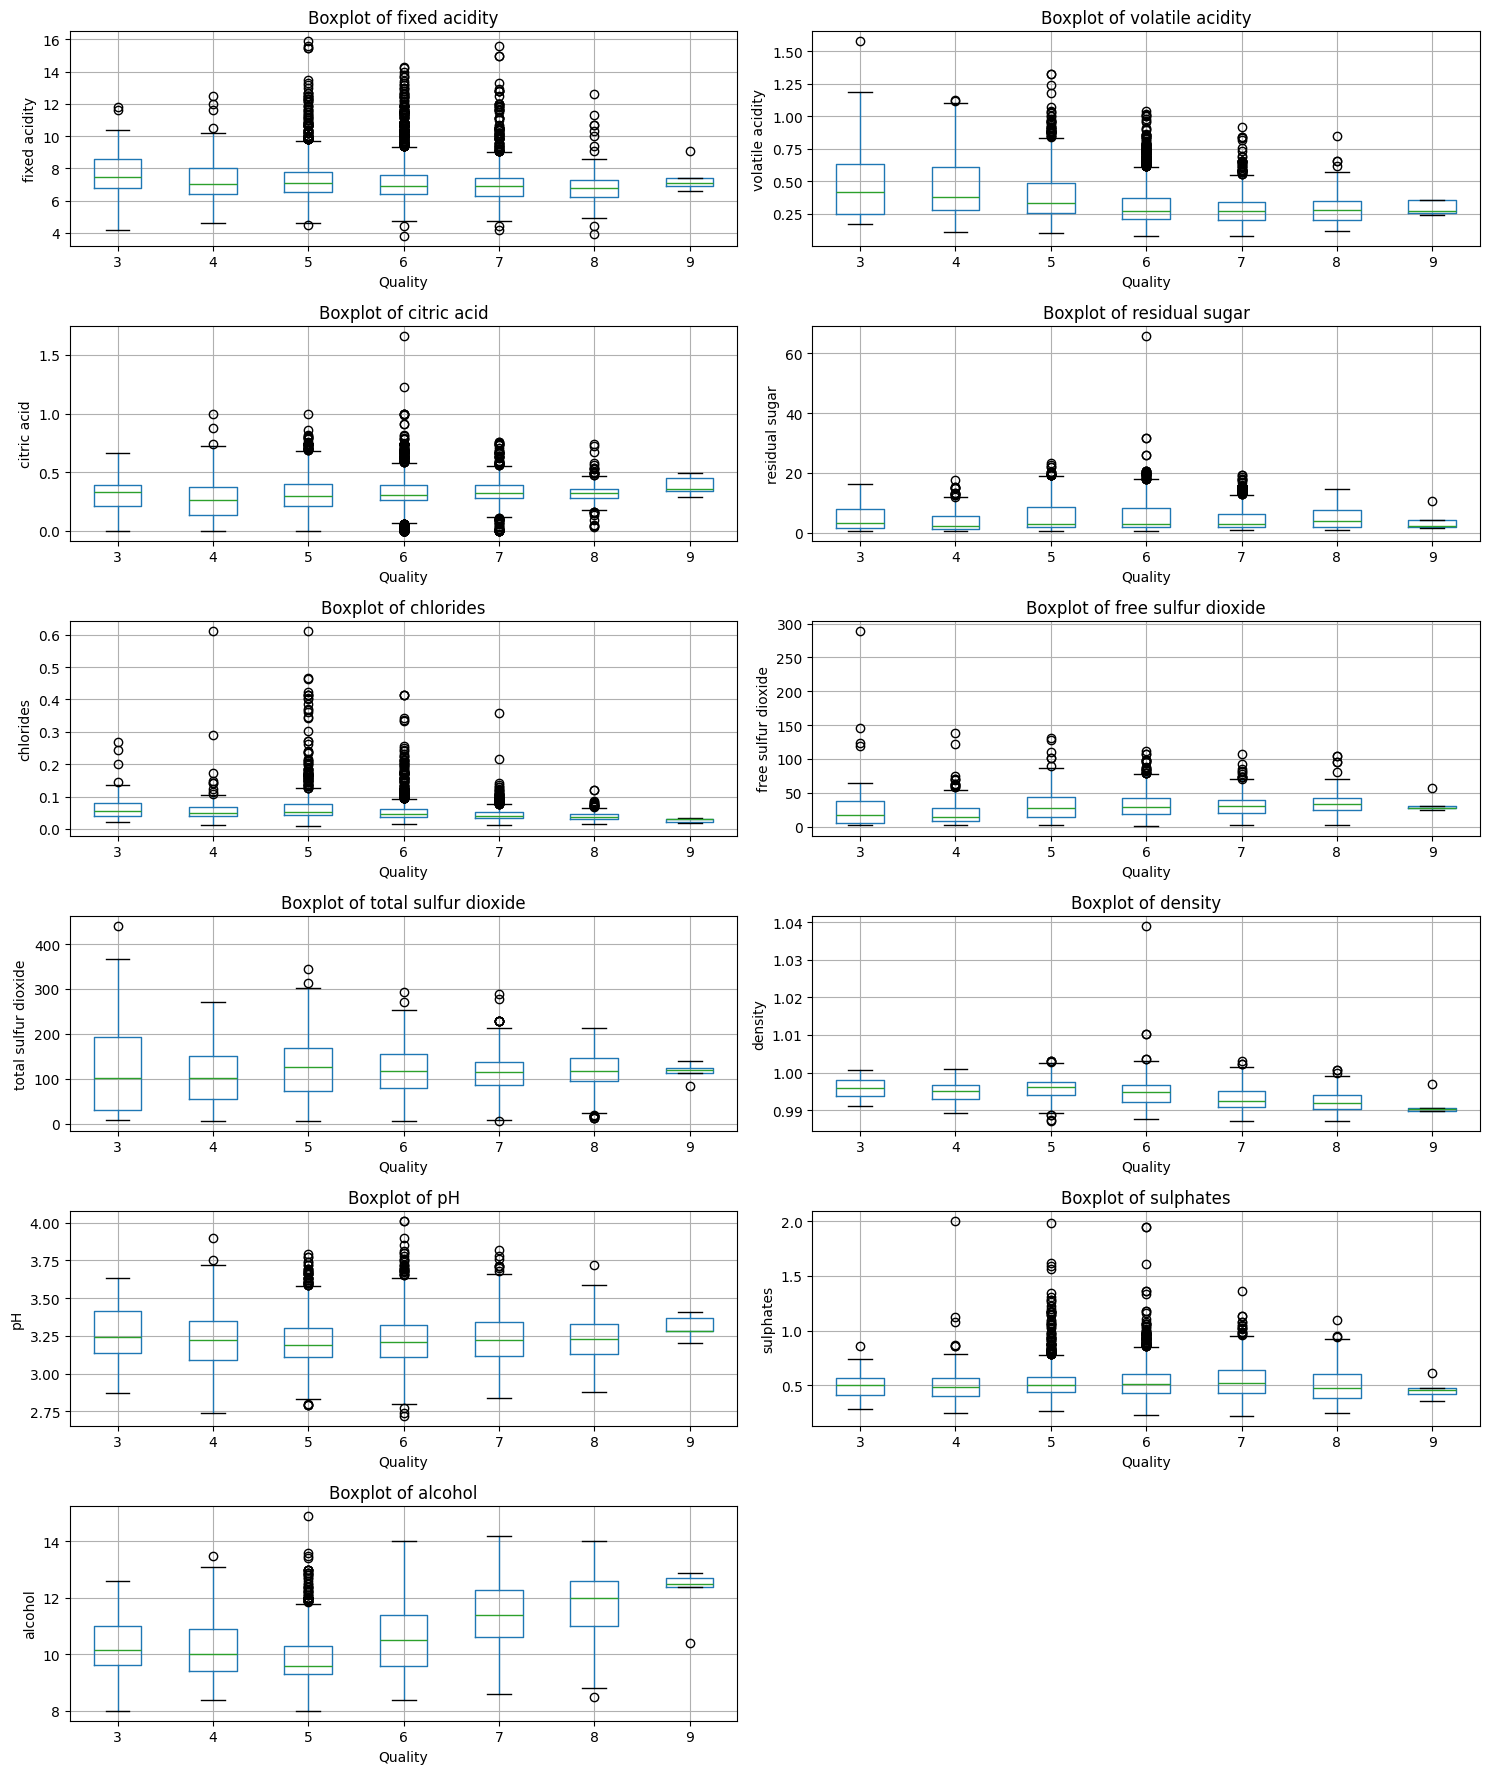

In [ ]:

y_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']

# Create boxplots for each y variable
plt.figure(figsize=(15, 18))  # Adjust the figure size if needed
for idx, y_var in enumerate(y_vars, start=1):
    plt.subplot(6, 2, idx)  # 6 rows, 2 columns grid layout
    df_full.boxplot(column=y_var, by='quality', ax=plt.gca())
    plt.title(f'Boxplot of {y_var}')
    plt.xlabel('Quality')
    plt.ylabel(y_var)

plt.suptitle('')  # Remove the default title to avoid overlap
plt.tight_layout()
plt.show()

From full dataset(white wine and red wine) above, we can see Boxplot a lot of outlier, using IQR method to remove outlier.(BUT NOT REALLY RECOMMEND)

In [ ]:
#Data Cleaning
def remove_outliers_iqr(df, features):
    cleaned_df = df.copy()
    for feature in features:
        Q1 = cleaned_df[feature].quantile(0.25)
        Q3 = cleaned_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
    return cleaned_df

features_to_clean = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

df_cleaned = remove_outliers_iqr(df_full, features_to_clean)

print("Original shape:", df_full.shape)
print("After cleaning:", df_cleaned.shape)


Original shape: (6497, 13)
After cleaning: (4596, 13)


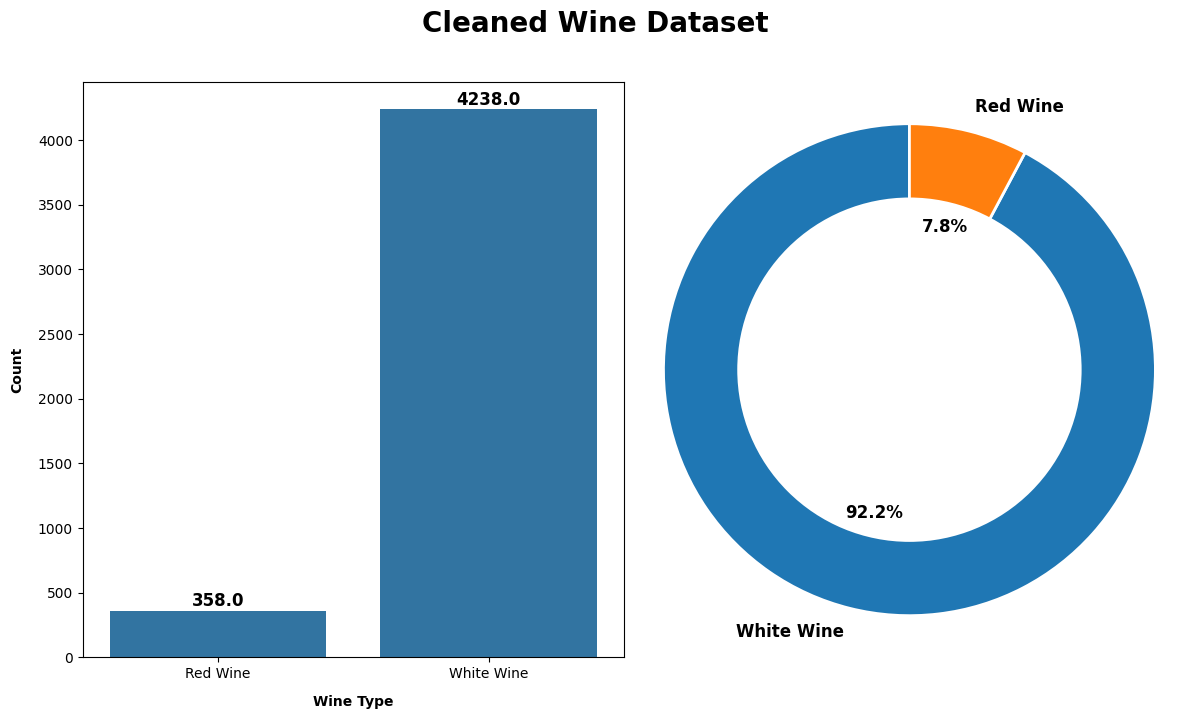

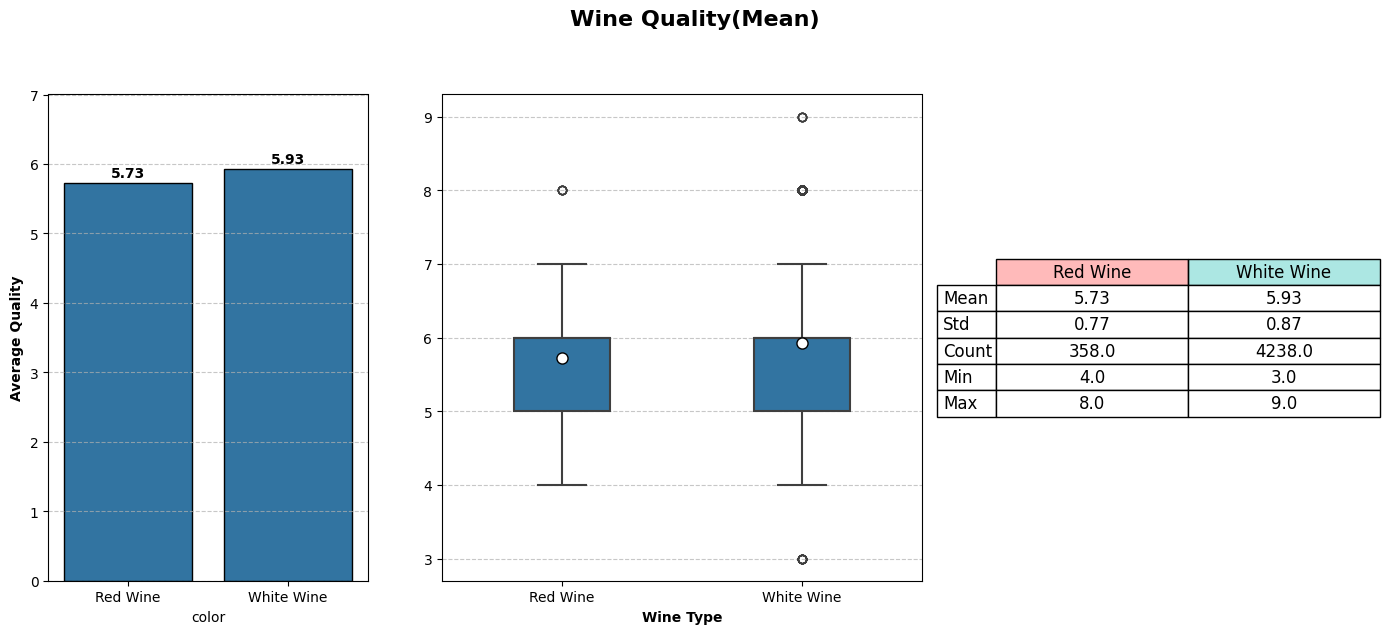

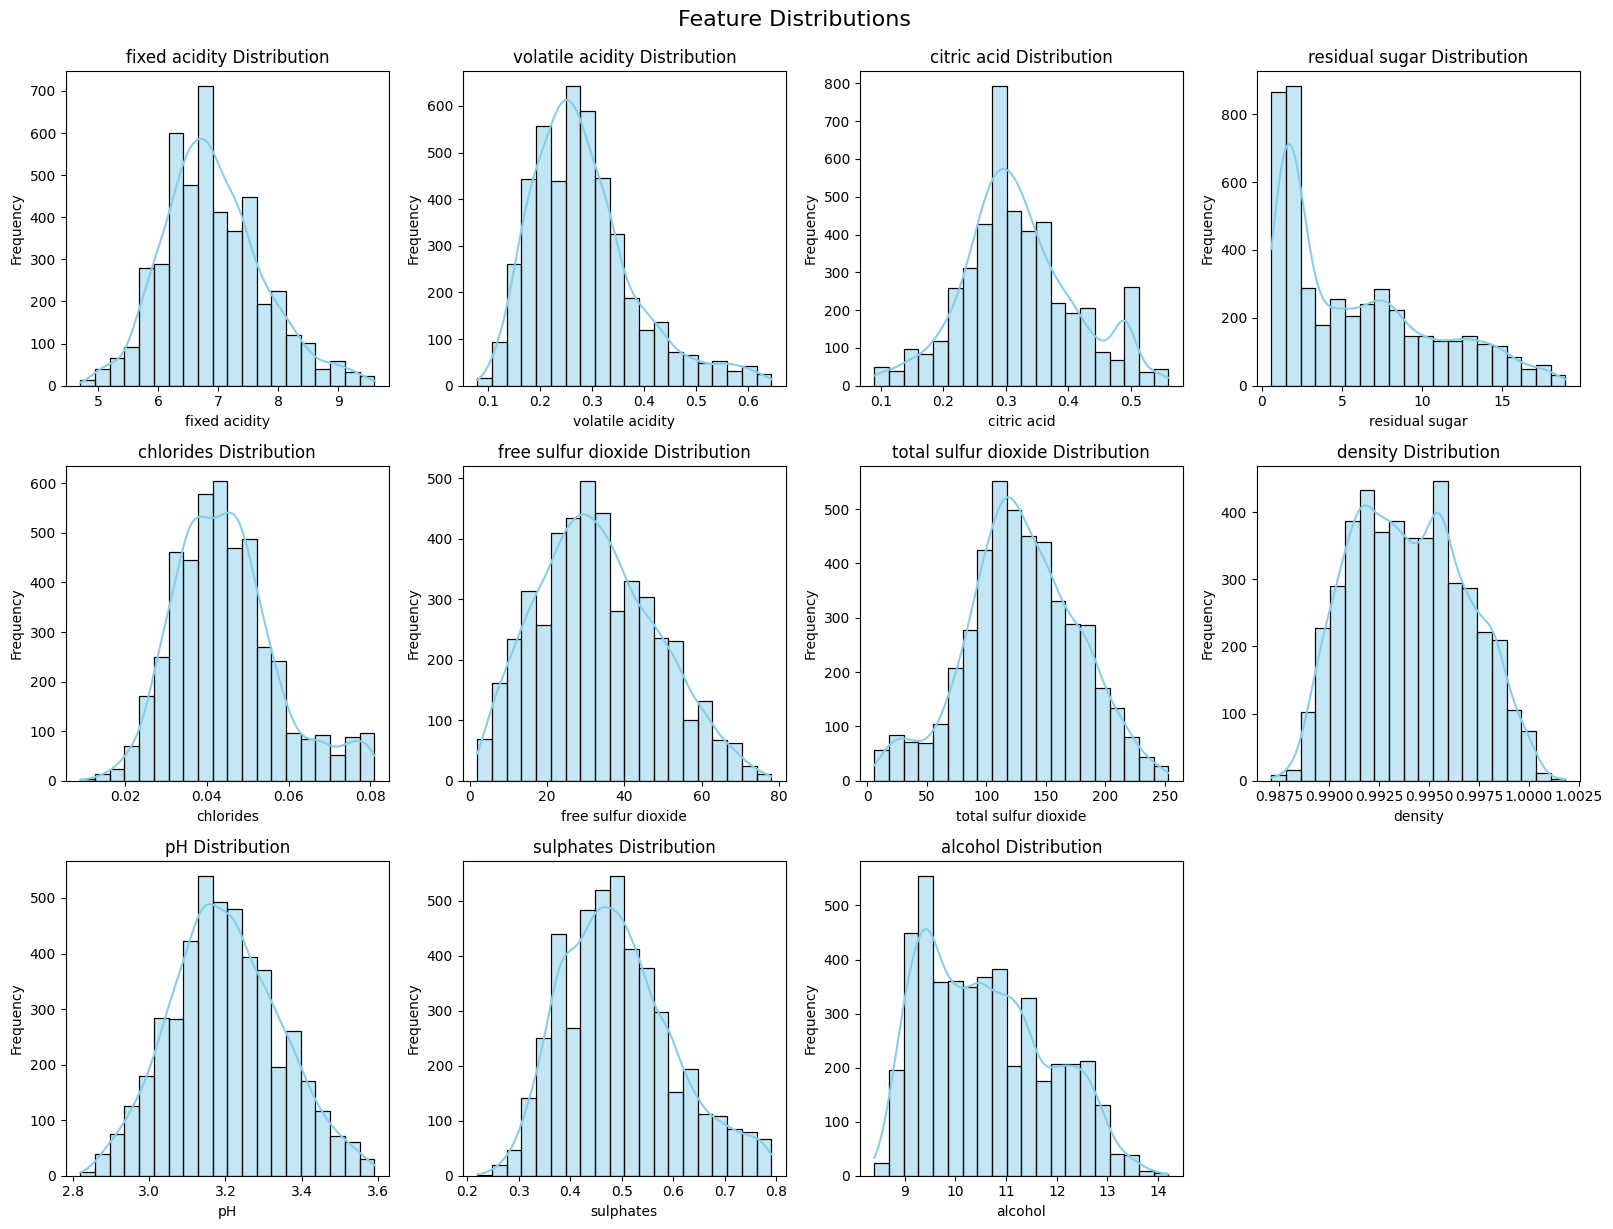

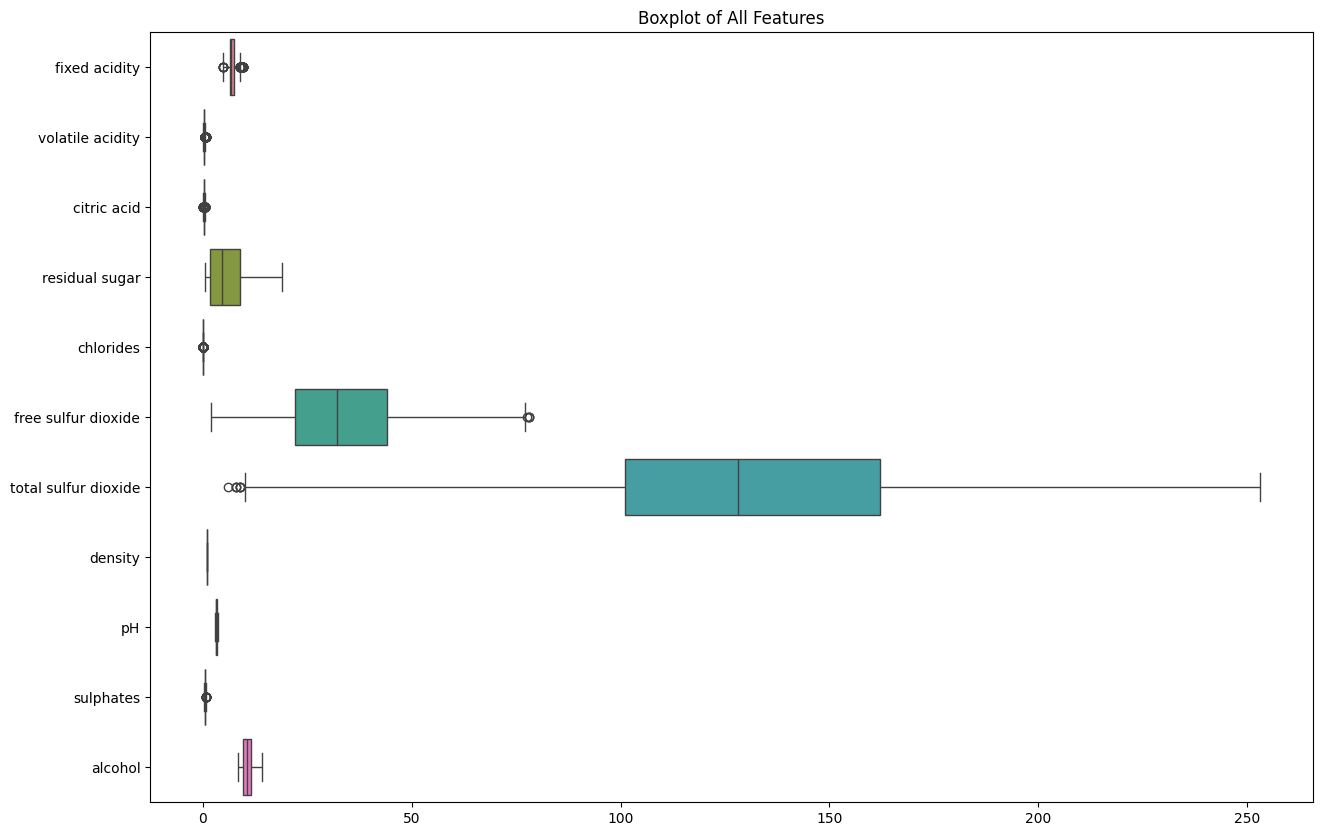

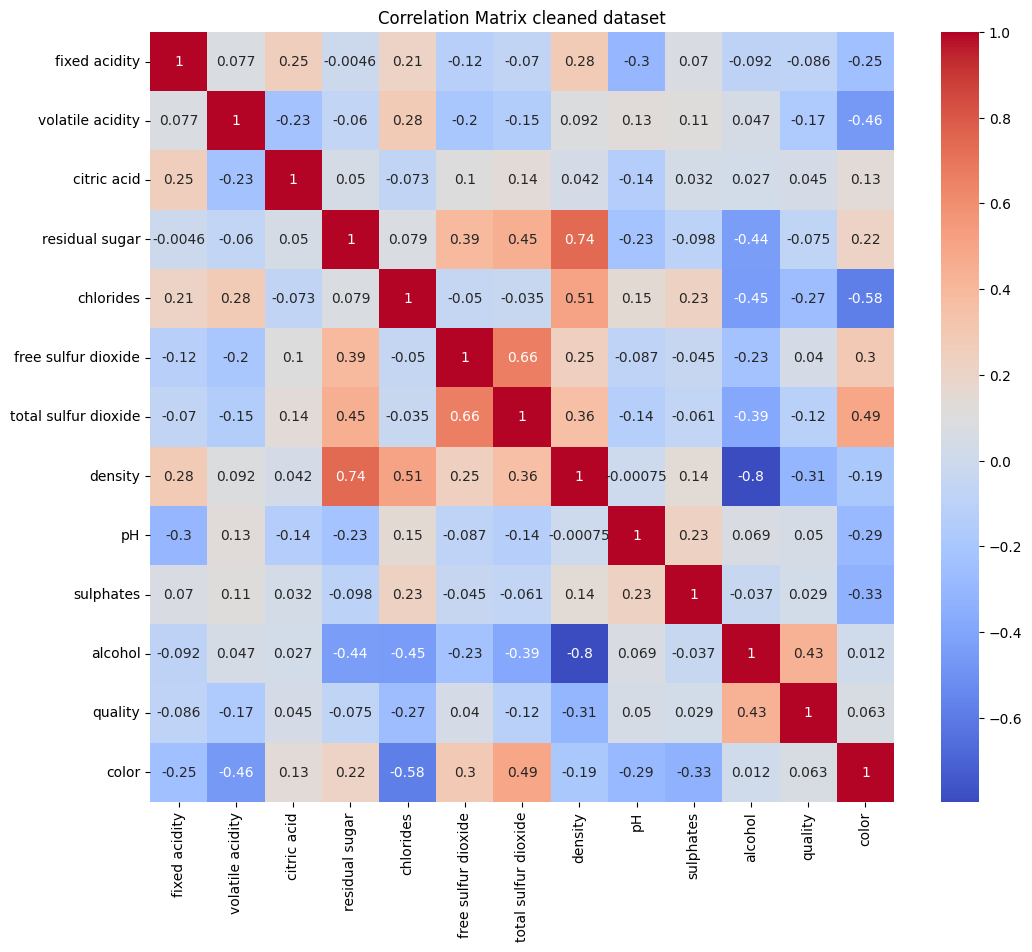

In [ ]:
from matplotlib import cm

# Create figure with subplots
f, ax = plt.subplots(1, 2, figsize=(12, 7))

# Countplot with annotations
count_plot = sns.countplot(data=df_cleaned, x='color', ax=ax[0])
ax[0].set_xlabel('Wine Type', labelpad=10, fontweight='bold')
ax[0].set_ylabel('Count', labelpad=10, fontweight='bold')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Red Wine', 'White Wine'], rotation=0)

# Add exact count labels on bars
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 7),
                       textcoords='offset points',
                       fontsize=12,
                       fontweight='bold')

# Pie/Donut chart with matching colors
labels = ['White Wine', 'Red Wine']
sizes = df_cleaned['color'].value_counts().values

# Draw pie chart
ax[1].pie(sizes, labels=labels,
          autopct='%1.1f%%', startangle=90,
          wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
          textprops={'fontsize': 12, 'fontweight': 'bold'})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax[1].add_artist(centre_circle)
ax[1].axis('equal')
plt.suptitle("Cleaned Wine Dataset", y=1.02, fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()
print("\n")

# Calculate quality statistics
quality_stats = df_cleaned.groupby('color').agg(
    Mean=('quality', 'mean'),
    Std=('quality', 'std'),
    Count=('quality', 'count'),
    Min=('quality', 'min'),
    Max=('quality', 'max')
).reset_index()

# Create visualization
plt.figure(figsize=(14, 6))
grid = plt.GridSpec(1, 3, width_ratios=[1, 1.5, 1.2])

# Bar plot for means
ax1 = plt.subplot(grid[0])
sns.barplot(data=quality_stats, y='Mean', x='color', edgecolor='black',
           errorbar=None, ax=ax1)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Red Wine', 'White Wine'], rotation=0)
ax1.set_ylim(0, 7)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylabel('Average Quality', fontweight='bold')

# Add value annotations
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points',
                fontweight='bold')

# Box plot with distribution
ax2 = plt.subplot(grid[1])
sns.boxplot(data=df_cleaned, y='quality', x='color',
           linewidth=1.5, width=0.4, showmeans=True,
           meanprops={"marker":"o", "markerfacecolor":"white",
                      "markeredgecolor":"black", "markersize":"8"})
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Red Wine', 'White Wine'], rotation=0)
ax2.set_ylabel('')
ax2.set_xlabel('Wine Type', fontweight='bold')
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

# Statistical table
ax3 = plt.subplot(grid[2])
ax3.axis('off')
table_data = quality_stats.set_index('color').T
table = ax3.table(cellText=table_data.round(2).values,
                 rowLabels=table_data.index,
                 colLabels=['Red Wine', 'White Wine'],
                 cellLoc='center',
                 loc='center',
                 colColours=['#ff6b6b77', '#4ecdc477'])
table.scale(1, 1.5)
table.set_fontsize(12)

plt.suptitle("Wine Quality(Mean)",
            y=1.05, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
print("\n")

# Feature distributions
features = df_cleaned.columns[:-2]
# Create KDE + histogram plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df_cleaned[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if features < 12
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02, fontsize=16)
plt.show()
print("\n")

# Boxplot visualization for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned[features], orient="h")
plt.title('Boxplot of All Features')
plt.show()
print("\n")

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix cleaned dataset")
plt.show()


<ipython-input-6-d54292b1e7e7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')


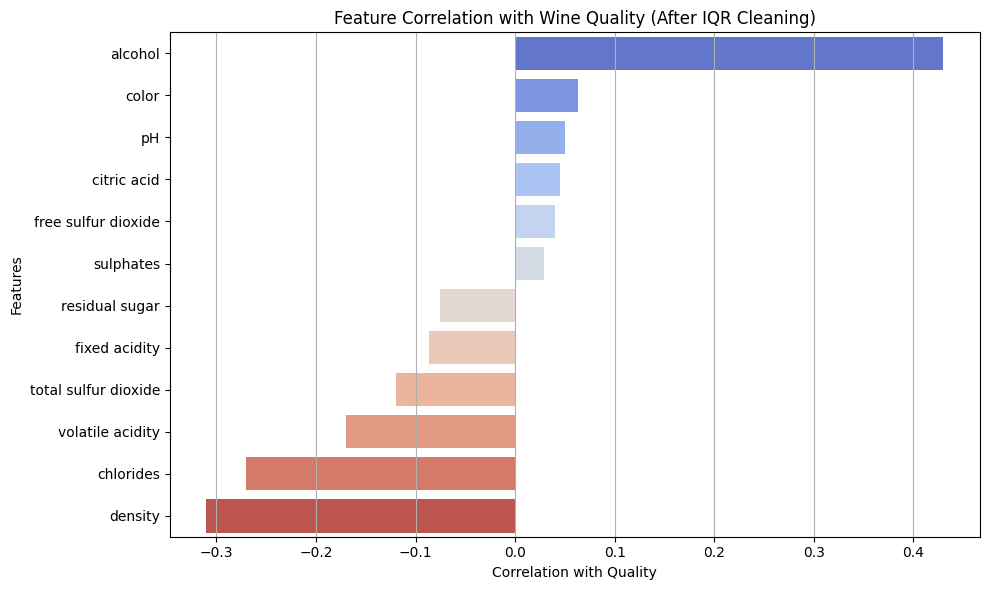

In [ ]:
# Correlation values with 'quality' from the above data cleaned corr matrix, EDIT IF VALUE DIFFERENT!!!!!!!!!
correlations = {
    'fixed acidity': -0.086,
    'volatile acidity': -0.17,
    'citric acid': 0.045,
    'residual sugar': -0.075,
    'chlorides': -0.27,
    'free sulfur dioxide': 0.04,
    'total sulfur dioxide': -0.12,
    'density': -0.31,
    'pH': 0.05,
    'sulphates': 0.029,
    'alcohol': 0.43,
    'color': 0.063
}

# Create DataFrame for plotting
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')
plt.title('Feature Correlation with Wine Quality (After IQR Cleaning)')
plt.xlabel('Correlation with Quality')
plt.ylabel('Features')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



After done data cleaning using IQR method, Fetures Distributions have mostly symmetrical, but some positive skewed(volatile acidity, residusual sugar,alcohol) <br><br>the correlation matrix has slightly different.<br>
Alcohol has the strongest positive influence on wine quality at 0.43.
Density, chlorides, and volatile acidity have the most negative impact on wine quality



Model Parameters (Multiple Linear Regression): {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False}

Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 0.5682
Mean Squared Error (MSE): 0.5191
Root Mean Squared Error (RMSE): 0.7205
Accuracy (MLR): 0.5359
Precision (MLR): [0.         0.         0.65079365 0.51433121 0.45631068 0.
 0.        ]


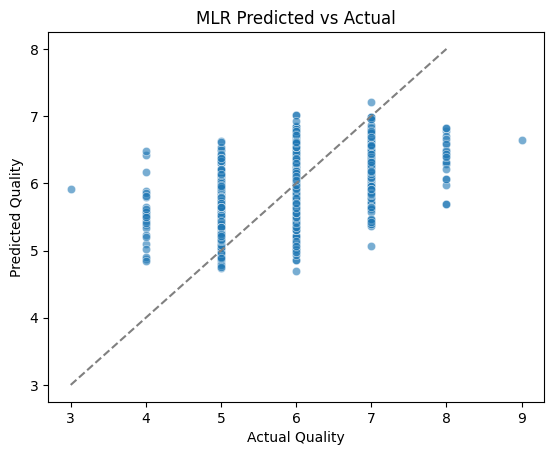

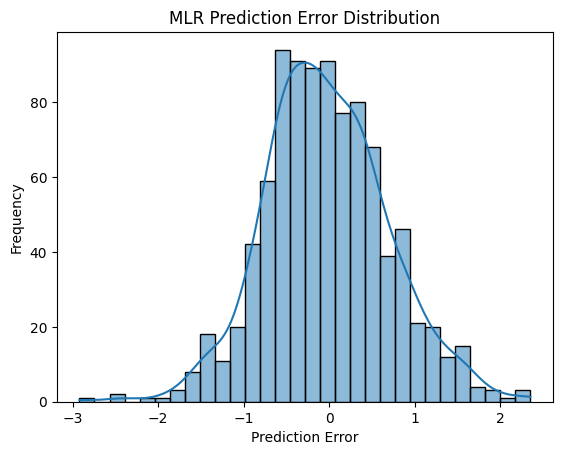



Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (19,), 'max_iter': 2000, 'solver': 'adam'}

Neural Network Metrics:
Mean Absolute Error (MAE): 0.5417
Mean Squared Error (MSE): 0.4795
Root Mean Squared Error (RMSE): 0.6925
Accuracy (Neural Network): 0.5554
Precision (Neural Network): [0.         0.5        0.62962963 0.55241935 0.43708609 0.
 0.        ]


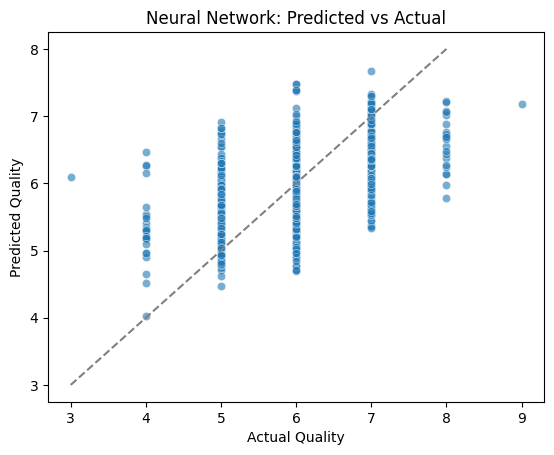

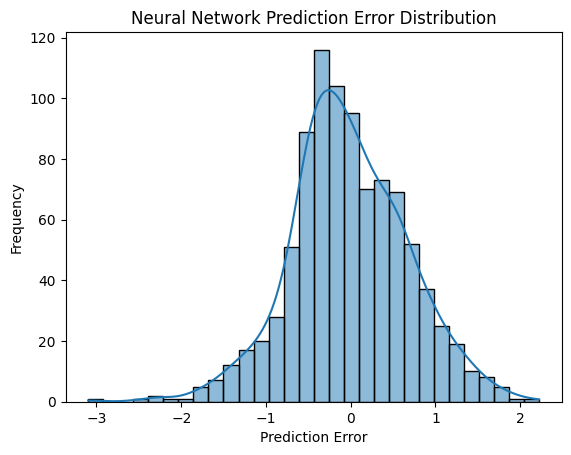

In [ ]:
#Split Data
newFulldf = df_cleaned.copy()
newFulldf.head()
X = newFulldf.drop(columns=['quality'])  # Keep 'color' as a feature (optional)
y = newFulldf['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple Linear Regression (MLR)
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
y_pred_mlr = mlr.predict(X_test_scaled)

# Regression metrics for MLR
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

print("Model Parameters (Multiple Linear Regression): {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False}")
print("\nMultiple Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlr:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlr:.4f}")

# Classification based on regression predictions
def classify(y_pred, y_actual, tol):
    return [actual if abs(pred - actual) <= tol else round(pred) for actual, pred in zip(y_actual, y_pred)]

TOLERANCE = 0.25
class_pred_mlr = classify(y_pred_mlr, y_test, TOLERANCE)

# Accuracy and precision
print(f"Accuracy (MLR): {accuracy_score(y_test, class_pred_mlr):.4f}")
print(f"Precision (MLR): {precision_score(y_test, class_pred_mlr, average=None, zero_division=0)}")

plt.figure()
sns.scatterplot(x=y_test, y=y_pred_mlr, alpha=0.6)
plt.plot([3,8], [3,8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("MLR Predicted vs Actual")
plt.show()
print('')
errors_mlr = y_test - y_pred_mlr
plt.figure()
sns.histplot(errors_mlr, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('MLR Prediction Error Distribution')
plt.show()
print('')

# Neural Network Regression
mlp = MLPRegressor(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1, 11)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam']
}

param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(5, 21)],  # Increase range slightly
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu'],  # 'logistic' slows training for larger datasets
    'solver': ['adam'],  # 'adam' is better for large datasets
    'max_iter': [2000, 3000]  # Increased iterations
}

#
grid = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid.best_params_}")

# Evaluate best estimator
y_pred_mlp = grid.best_estimator_.predict(X_test_scaled)

# Metrics for Neural Network
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

print("\nNeural Network Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlp:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlp:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp:.4f}")

class_pred_mlp = classify(y_pred_mlp, y_test, TOLERANCE)

# Accuracy and precision for Neural Network
print(f"Accuracy (Neural Network): {accuracy_score(y_test, class_pred_mlp):.4f}")
print(f"Precision (Neural Network): {precision_score(y_test, class_pred_mlp, average=None, zero_division=0)}")

plt.figure()
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Neural Network: Predicted vs Actual")
plt.show()

errors_mlp = y_test - y_pred_mlp
plt.figure()
sns.histplot(errors_mlp, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Neural Network Prediction Error Distribution')
plt.show()



Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

K-Nearest Neighbors (KNN) Metrics:
Mean Absolute Error (MAE): 0.3930
Mean Squared Error (MSE): 0.3602
Root Mean Squared Error (RMSE): 0.6002
Accuracy (KNN): 0.6739
Precision (KNN): [0.         0.8        0.73577236 0.65560166 0.62777778 0.85714286
 0.        ]


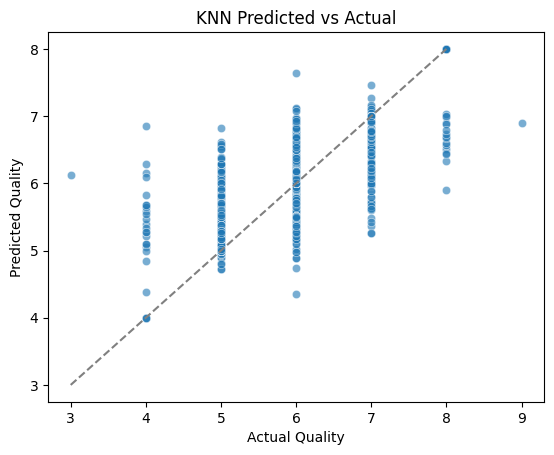

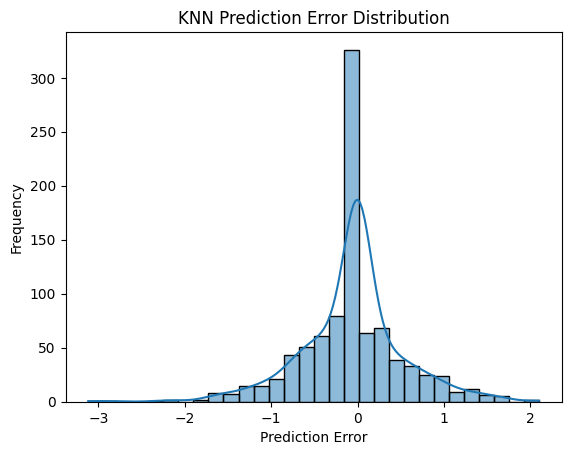


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Metrics:
Mean Absolute Error (MAE): 0.4240
Mean Squared Error (MSE): 0.3427
Root Mean Squared Error (RMSE): 0.5854
Accuracy (Random Forest): 0.6663
Precision (Random Forest): [0.         0.66666667 0.70769231 0.64587525 0.6516129  1.
 0.        ]


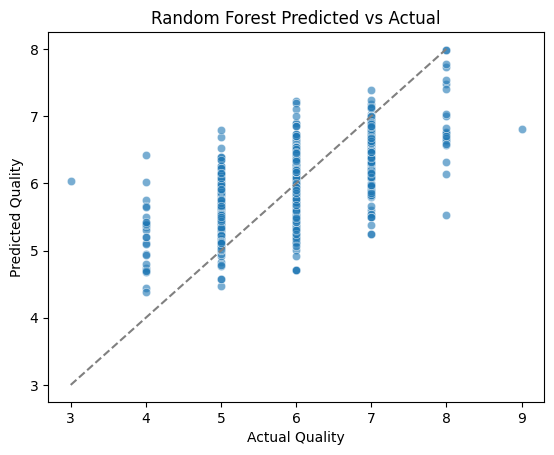

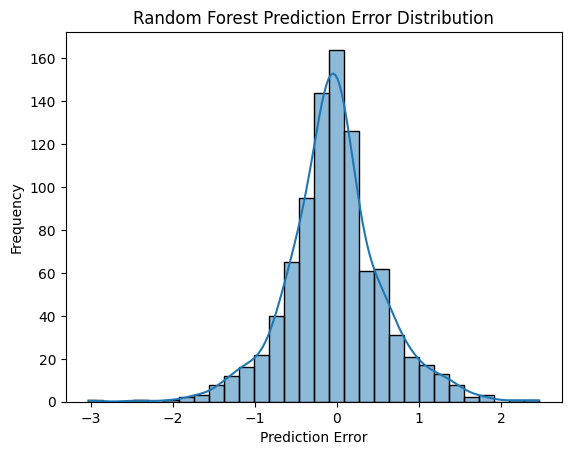

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# KNN Regression with GridSearchCV
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_absolute_error', cv=5)
grid_knn.fit(X_train_scaled, y_train)

print(f"\nBest Parameters (KNN): {grid_knn.best_params_}")

# Evaluate best estimator
y_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled)

# Metrics for KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("\nK-Nearest Neighbors (KNN) Metrics:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")

# Classification based on regression predictions
class_pred_knn = classify(y_pred_knn, y_test, TOLERANCE)

# Accuracy and precision for KNN
print(f"Accuracy (KNN): {accuracy_score(y_test, class_pred_knn):.4f}")
print(f"Precision (KNN): {precision_score(y_test, class_pred_knn, average=None, zero_division=0)}")

# Scatter plot for KNN predicted vs actual
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("KNN Predicted vs Actual")
plt.show()

# Error distribution plot for KNN
errors_knn = y_test - y_pred_knn
plt.figure()
sns.histplot(errors_knn, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('KNN Prediction Error Distribution')
plt.show()

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_absolute_error', cv=5)
grid_rf.fit(X_train_scaled, y_train)

print(f"\nBest Parameters (Random Forest): {grid_rf.best_params_}")

# Evaluate best estimator
y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\nRandom Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

# Classification based on regression predictions
class_pred_rf = classify(y_pred_rf, y_test, TOLERANCE)

# Accuracy and precision for Random Forest
print(f"Accuracy (Random Forest): {accuracy_score(y_test, class_pred_rf):.4f}")
print(f"Precision (Random Forest): {precision_score(y_test, class_pred_rf, average=None, zero_division=0)}")

# Scatter plot for Random Forest predicted vs actual
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest Predicted vs Actual")
plt.show()

# Error distribution plot for Random Forest
errors_rf = y_test - y_pred_rf
plt.figure()
sns.histplot(errors_rf, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Random Forest Prediction Error Distribution')
plt.show()


Best Parameters (Decision Tree): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Metrics:
Mean Absolute Error (MAE): 0.5022
Mean Squared Error (MSE): 0.7174
Root Mean Squared Error (RMSE): 0.8470
Accuracy (Decision Tree): 0.5870
Precision (Decision Tree): [0.         0.23076923 0.62283737 0.63636364 0.55757576 0.25
 0.        ]


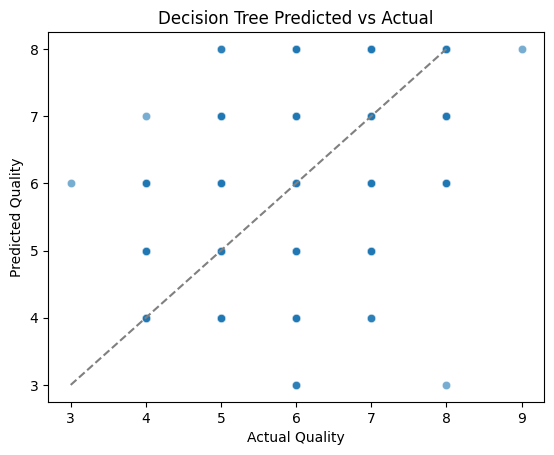

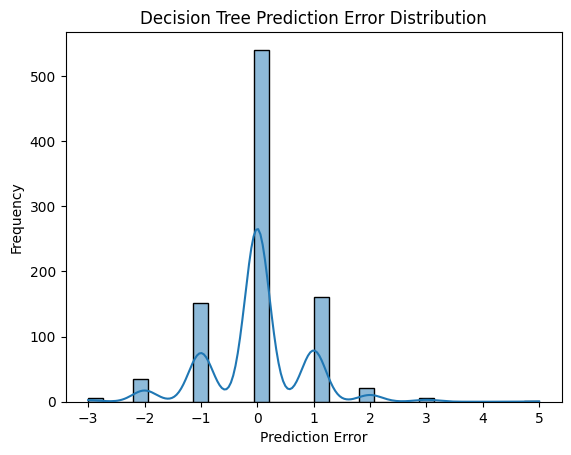

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='neg_mean_absolute_error', cv=5)
grid_dt.fit(X_train_scaled, y_train)

print(f"\nBest Parameters (Decision Tree): {grid_dt.best_params_}")

# Evaluate best estimator
y_pred_dt = grid_dt.best_estimator_.predict(X_test_scaled)

# Metrics for Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("\nDecision Tree Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")

# Classification based on regression predictions
class_pred_dt = classify(y_pred_dt, y_test, TOLERANCE)

# Accuracy and precision for Decision Tree
print(f"Accuracy (Decision Tree): {accuracy_score(y_test, class_pred_dt):.4f}")
print(f"Precision (Decision Tree): {precision_score(y_test, class_pred_dt, average=None, zero_division=0)}")

# Scatter plot for Decision Tree predicted vs actual
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Decision Tree Predicted vs Actual")
plt.show()

# Error distribution plot for Decision Tree
errors_dt = y_test - y_pred_dt
plt.figure()
sns.histplot(errors_dt, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Decision Tree Prediction Error Distribution')
plt.show()
